## Dummy variables and one hot encoding

Dealing wiith categorical data. 

In [1]:
import pandas as pd

In [2]:
# This dataset has the additional 'town' column. We want to build a function to predict the price of the home considering the variables 
# town and area. 
df = pd.read_csv('datasets/lesson6_homeprices.csv')
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


We need to handle the text data in the 'town' column and convert it to numeric data. Label encoding is one approach, it assigns a number to an entry in the 'town' column. For example 'monroe township' = 1, 'west windsor' = 2 and 'robbinsville' = 3. An issue with this approach is that the model may assume an order to the numbers assigned. It may make assumptions such as 'monroe township' < 'west windsor' or 'monroe township' + 'west windsor' = 'robbinsville'. 

The column ' town' is a categorical nominal variable, rather than ordinal since there are no numerical ordering in the data. One hot encoding is a technique that can be used for this type of variable. 

One hot encoding will create new columns (dummy variables) for each unique entry in the 'town' column. The entry for the new column will either be assigned 0 if the column does not match with the entry in the 'town' column for that row and will be assigned 1 if it does match. For example, the 'monroe township' column will have 1s for the rows where the 'town' is 'monroe township' and 0 for the others. 

In [3]:
dummies = pd.get_dummies(df.town)
dummies 

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:
frames = [df, dummies]
full_df = pd.concat(frames, axis = 1)
full_df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [5]:
final_df = full_df.drop(['town', 'west windsor'], axis = 'columns')

In [6]:
final_df

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
X_train = final_df.drop('price', axis = 'columns')
y_train = final_df.price

In [9]:
model.fit(X_train, y_train)

LinearRegression()

Predict the following:
1) 3400 sq ft area in west windsor.  
2) 2800 sq ft area in robbinsville.

In [10]:
preds_1 = model.predict([[3400, 0, 0]])

In [11]:
preds_2 = model.predict([[2800, 0, 1]])

In [12]:
print(f"The prediction for 1) is {round(preds_1[0], 2)} and 2) is {round(preds_2[0], 2)}.")

The prediction for 1) is 681241.67 and 2) is 590775.64.


In [13]:
# Get the score of the model. It compares the predicted values and the actual values.
model.score(X_train, y_train)

0.9573929037221873

# One hot encoding

Now we will use one hot encoding method to do the same thing. 

In [14]:
# First, we use the label encoder for the 'town' column. 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df_le = df
df_le.town = le.fit_transform(df_le.town)

In [16]:
df_le

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [17]:
X_train = df_le[['town', 'area']].values # We want X_train to be a 2-D array and not a DataFrame. 
y_train = df_le.price
X_train

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories = 'auto'), [0])], 
    remainder = 'passthrough')

# OHE assumes all columns in X to be categorical variables. Hence, we need to specify the column which has categorical features using
# ColumnTransformer. 

In [19]:
# Create the dummy variables using the ColumnTransformer and OneHotEncoder method. 
X_train = ct.fit_transform(X_train) 
X_train

# Originally, there were two columns ('town' and 'area'). Now, 'town' has become three columns after using OHE method, one for each 
# unique value in the 'town' column, the area is unchanged. 

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [20]:
# Drop the first entry in each array element to avoid the dummy variable trap. 
X_train = X_train[:, 1:]

In [21]:
# X_train and y_train are now ready for fitting the model. 
# Recall: model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [22]:
preds_ohe_1 = model.predict([[0, 1, 3400]])
preds_ohe_2 = model.predict([[1, 0, 2800]])

In [23]:
print(f"""Get dummies method:
1) {round(preds_1[0], 2)}
2) {round(preds_2[0], 2)}

One Hot Encoding method:
1) {round(preds_ohe_1[0], 2)}
2) {round(preds_ohe_2[0], 2)}""")

Get dummies method:
1) 681241.67
2) 590775.64

One Hot Encoding method:
1) 681241.67
2) 590775.64


In [24]:
pd.DataFrame(X_train)

,0,1,2
0,0.0,0.0,2600.0
1,0.0,0.0,3000.0
2,0.0,0.0,3200.0
3,0.0,0.0,3600.0
4,0.0,0.0,4000.0
5,0.0,1.0,2600.0
6,0.0,1.0,2800.0
7,0.0,1.0,3300.0
8,0.0,1.0,3600.0
9,1.0,0.0,2600.0


# Exercise

Predict the price of the cars using linear regression (if suitable) by taking into account the features available in the dataset. 

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
carprices = pd.read_csv("datasets/lesson6_ex_carprices.csv")
carprices

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


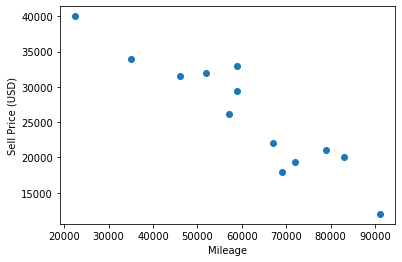

In [28]:
plt.xlabel('Mileage')
plt.ylabel('Sell Price (USD)')
plt.scatter(carprices['Mileage'], carprices['Sell Price($)'])

There is a clear negative correlation in this dataset. The higher the mileage, the lower the sell price, therefore, we can use linear regression.

Now, we will transform the text data in the 'Car Model' column into categorical numeric data using One Hot Encoding. 

In [29]:
# First, we convert the 'Car Model' columns into numeric data using the label encoding technique.
le = LabelEncoder()

carprices_le = carprices

carprices_le['Car Model'] = le.fit_transform(carprices_le['Car Model'])

carprices_le

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [30]:
X_train = carprices_le[['Car Model', 'Mileage', 'Age(yrs)']]
y_train = carprices_le['Sell Price($)']
X_train

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [31]:
# We can now use the OneHotEncoder and ColumnTransform to convert the data in 'Car Model' to multiple OHE variables. 
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories = 'auto'), [0])], 
    remainder = 'passthrough')

In [32]:
X_train = ct.fit_transform(X_train)
X_train

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [33]:
# Drop the first entry in each array element (list) to avoid the dummy variable trap which results in multicollinearity related issues. 
X_train = X_train[:, 1:]
X_train

# So we had Audi (0), BMW (1) and Mercedez Benz (2). After dropping the first entry (Audi), we are left with BMW (0) and Mercedez Benz (1).

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [34]:
model = LinearRegression()

In [35]:
# Fitting the model with the final X and y variables. 
model.fit(X_train, y_train)

LinearRegression()

Price predictions using our model:
1) Mercedez Benz that is 4 years old with mileage 45,000.
2) BMW X5 that is 7 years old with mileage 86,000.
3) Score (accuracy) of the model. 

In [36]:
preds_price_1 = model.predict([[0, 1, 45000, 4]])
preds_price_2 = model.predict([[1, 0, 86000, 7]])
model.score(X_train, y_train)

0.9417050937281083

In [37]:
print(f"""Price predictions:
1) {round(preds_price_1[0], 2)}
2) {round(preds_price_2[0], 2)}

The score (accuracy of the model is {model.score(X_train, y_train)})""")

Price predictions:
1) 36991.32
2) 11080.74

The score (accuracy of the model is 0.9417050937281083)


In [38]:
model.intercept_

56523.08523128357